In [34]:
#---------------------IMPORTS--------------------------#
import matplotlib.pyplot as plt
import numpy 
import scipy.optimize as scop
import math

In [2]:
#--------------------BISECCION------------------------#
def biseccion(f, x_inicial, x_final):
    a = x_inicial
    b = x_final
    
    error = abs(b-a)
    x_act = (a + b)/2
    
    i = 0
    while( error > 1e-5 ):
        
        i += 1
        
        x_act = (a + b)/2
        
        print('paso: ' + str(i) + 'valor: ' + str(x_act) )
        
        error = abs(b-a)/(2**i)
        
        if(f(a)*f(x_act) > 0):
            a = x_act
            
        if(f(b)*f(x_act) > 0):
            b = x_act
            
        if( f(x_act) == 0 ):
            return x_act
        
    return x_act

In [3]:
def newton_raphson(f, f_fder, seed):
    x_act = seed
    error = 1.0 #Para inicializar
    
    #Controla que la seed no sea raiz
    if(f(x_act) == 0):
        return x_act
    
    #Primera iteracion
    x_sig = x_act - ( f(x_act)/f_fder(x_act) )
    if(f(x_act) == 0):
        return x_act
    error = abs(x_sig - x_act) 
    x_act = x_sig
    
    i = 0
    while( error > 1e-13 ):
        
        x_sig = x_act - (f(x_act)/f_fder(x_act))  
        if(f(x_act) == 0):
            return x_act  
        error = abs( x_sig - x_act ) 
        x_act = x_sig
        
        i += 1
        print('paso: ' + str(i) + ' valor: ' + str(x_act) )
    
    return x_act

In [4]:
#------------NEWTON-RAPHSON MODIFICADO----------------#
def newton_raphson_modificado(f, f_fder, f_sder, seed):
    x_act = seed
    error = 1.0 #Para inicializar
    
    #Controla que la seed no sea raiz
    if(f(x_act) == 0):
        return x_act
    
    #Primera iteracion
    x_sig = x_act - ( (f(x_act)*f_fder(x_act))/((f_fder(x_act)**2)-(f(x_act)*f_sder(x_act))) )
    if(f(x_sig) == 0):
        return x_sig
    error = abs(x_sig - x_act) 
    x_act = x_sig
    
    i=0
    
    while( error > 1e-13 ):
        
        x_sig = x_act - ((f(x_act)*f_fder(x_act))/((f_fder(x_act)**2)-(f(x_act)*f_sder(x_act))))  
        if(f(x_act) == 0):
            return x_act  
        error = abs( x_sig - x_act ) 
        x_act = x_sig
        
        i=i+1
        
        print('paso: ' + str(i) + ' valor: ' + str(x_act) )
     
    return x_act

In [5]:
#------------------SECANTE----------------------#
def secante(f, seed_1, seed_2):
    x_ant = seed_2
    x_act = seed_1
    error = 1.0 #Para inicializar
    
    #Controla que la seed no sea raiz
    if(f(x_ant) == 0):
        return x_ant
    
    if(f(x_act) == 0):
        return x_act
    
    #Primera iteracion
    f_fder=(f(x_act)-f(x_ant))/(x_act-x_ant)
    x_sig = x_act - ( f(x_act)/f_fder )
    if(f(x_sig) == 0):
        return x_sig
    error = abs(x_sig - x_act) 
    x_ant = x_act
    x_act = x_sig
    
    i = 0
    
    while( error > 1e-13 ):
    
        f_fder=(f(x_act)-f(x_ant))/(x_act-x_ant)
        x_sig = x_act - ( f(x_act)/f_fder )
        if(f(x_act) == 0):
            return x_act
        error = abs(x_sig - x_act) 
        x_ant = x_act
        x_act = x_sig
        
        i=i+1
        
        print('paso: ' + str(i) + ' valor: ' + str(x_act) )
    
    return x_act

In [6]:
#------------------FUNCIONES--------------------------#
def f_1(x):
    return (x**2) - 2

def f_2(x):
    return (x**5) - 6.6*(x**4) + 5.12*(x**3) + 21.312*(x**2) - 38.016*(x) + 17.28 

def f_3(x):
    return (x-1.5)*numpy.exp( -4*(x - 1.5)**2 )

#---------------DERIVADAS PRIMERAS--------------------#
def f_1_fder(x):
    return 2*x

def f_2_fder(x):
    return 5*(x**4) - 25*(x**3) + 15.36*(x**2) + 42.624*8*(x) - 38.016

def f_3_fder(x):
    return (-8*x + 12)*(x - 1.5)*numpy.exp(-4*( x - 1.5)**2 ) + numpy.exp( -4*(x - 1.5)**2 )

#--------------DERIVADAS SEGUNDAS--------------------#
def f_1_sder(x):
    return 2

def f_2_sder(x):
    return 20*(x**3) - 75*(x**2) + 30.72*x + 42.624*8 - 38.016

def f_3_sder(x):
    return (-24*(x**2)+(x-1.5)*((8*x+12.0)**2)+36.0) * numpy.exp(-4*(( x - 1.5 )**2)) 

# Graficos



In [7]:
#Factor de escala
rect = 1., 1., 1.5, 1.5

#Rango
rango_x = numpy.arange(0, 2, 0.01)

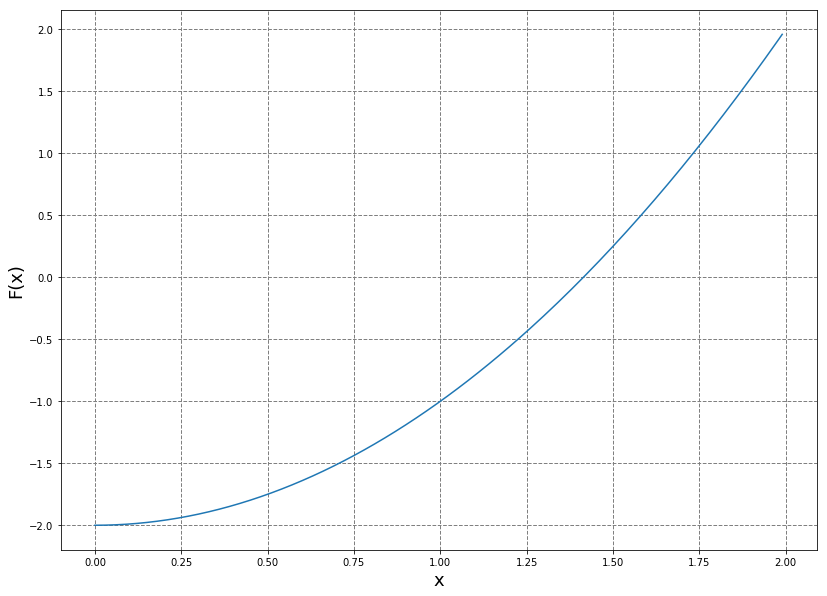

In [8]:
#Especificaciones del grafico
grafico = plt.figure( figsize = (7, 5) )
grafico.add_axes(rect)
plt.xlabel('x' ,fontsize = 18)
plt.ylabel('F(x)',fontsize = 18)

#Visualizacion
plt.plot(rango_x, f_1(rango_x))
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

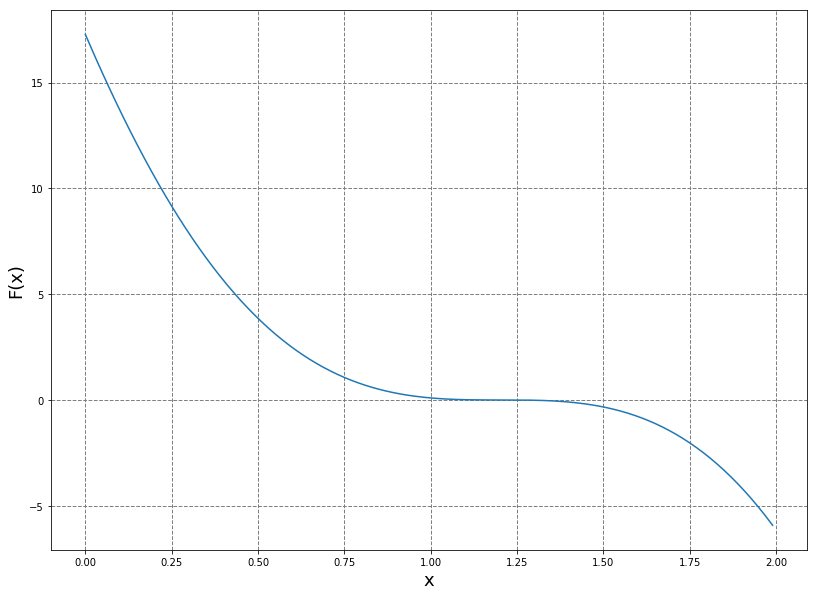

In [9]:
#Especificaciones del grafico
grafico = plt.figure( figsize = (7, 5) )
grafico.add_axes(rect)
plt.xlabel('x' ,fontsize = 18)
plt.ylabel('F(x)',fontsize = 18)

#Visualizacion
plt.plot(rango_x, f_2(rango_x))
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

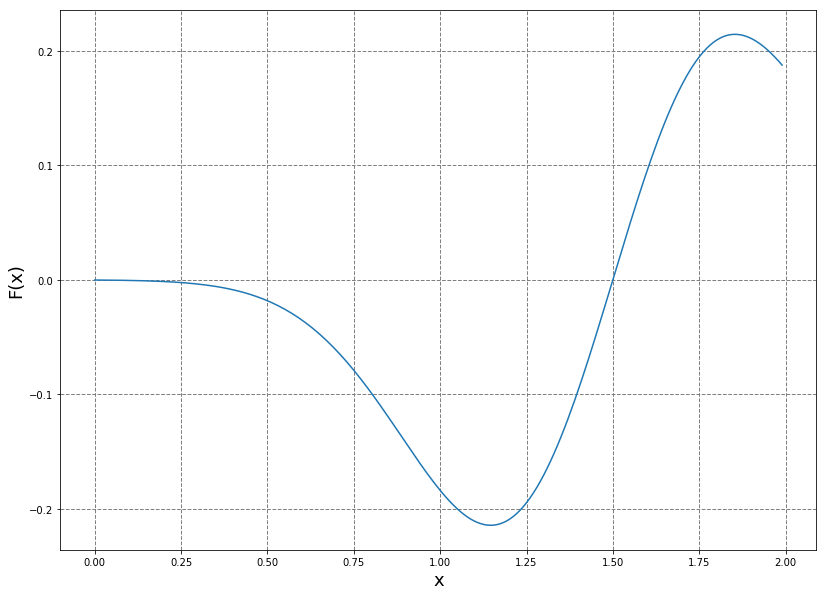

In [10]:
#Especificaciones del grafico
grafico = plt.figure( figsize = (7, 5) )
grafico.add_axes(rect)
plt.xlabel('x' ,fontsize = 18)
plt.ylabel('F(x)',fontsize = 18)

#Visualizacion
plt.plot(rango_x, f_3(rango_x))
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

# Ejemplos de funcionamiento


## Metodo de Biseccion

#### Funcion 1

In [11]:
biseccion(f_1, 0, 2)

paso: 1valor: 1.0
paso: 2valor: 1.5
paso: 3valor: 1.25
paso: 4valor: 1.375
paso: 5valor: 1.4375
paso: 6valor: 1.40625
paso: 7valor: 1.421875
paso: 8valor: 1.4140625
paso: 9valor: 1.41796875
paso: 10valor: 1.416015625


1.416015625

#### Funcion 2

In [12]:
biseccion(f_2, 0, 2)

paso: 1valor: 1.0
paso: 2valor: 1.5
paso: 3valor: 1.25
paso: 4valor: 1.125
paso: 5valor: 1.1875
paso: 6valor: 1.21875
paso: 7valor: 1.203125
paso: 8valor: 1.1953125
paso: 9valor: 1.19921875
paso: 10valor: 1.201171875


1.201171875

#### Funcion 3

In [14]:
biseccion(f_3, 0, 2)

paso: 1valor: 1.0
paso: 2valor: 1.5


1.5

### Metodo de Newton-Raphson

#### Funcion 1

In [15]:
newton_raphson(f_1, f_1_fder, 1.0)

paso: 1 valor: 1.4166666666666667
paso: 2 valor: 1.4142156862745099
paso: 3 valor: 1.4142135623746899
paso: 4 valor: 1.4142135623730951
paso: 5 valor: 1.414213562373095


1.414213562373095

#### Funcion 2

In [16]:
newton_raphson(f_2, f_2_fder, 1.0)

paso: 1 valor: 0.9993547728315049
paso: 2 valor: 0.9990296583495841
paso: 3 valor: 0.9987028568920127
paso: 4 valor: 0.9983743534422841
paso: 5 valor: 0.9980441327933136
paso: 6 valor: 0.9977121795442863
paso: 7 valor: 0.9973784780974403
paso: 8 valor: 0.9970430126547851
paso: 9 valor: 0.9967057672147513
paso: 10 valor: 0.9963667255687717
paso: 11 valor: 0.996025871297791
paso: 12 valor: 0.9956831877687029
paso: 13 valor: 0.9953386581307133
paso: 14 valor: 0.994992265311626
paso: 15 valor: 0.9946439920140508
paso: 16 valor: 0.9942938207115315
paso: 17 valor: 0.9939417336445909
paso: 18 valor: 0.9935877128166923
paso: 19 valor: 0.9932317399901136
paso: 20 valor: 0.9928737966817331
paso: 21 valor: 0.9925138641587246
paso: 22 valor: 0.992151923434158
paso: 23 valor: 0.9917879552625061
paso: 24 valor: 0.9914219401350506
paso: 25 valor: 0.9910538582751894
paso: 26 valor: 0.9906836896336396
paso: 27 valor: 0.9903114138835336
paso: 28 valor: 0.9899370104154076
paso: 29 valor: 0.98956045833207

4.9999999999995755

#### Funcion 3

In [17]:
newton_raphson(f_3, f_3_fder, 1.0)

paso: 1 valor: 0.35714285714285715
paso: 2 valor: 0.2361925331687751
paso: 3 valor: 0.12888718471356383
paso: 4 valor: 0.03122681404166311
paso: 5 valor: -0.05911276652864163
paso: 6 valor: -0.14363281981920134
paso: 7 valor: -0.22337347662012075
paso: 8 valor: -0.29909244409977276
paso: 9 valor: -0.3713629475555928
paso: 10 valor: -0.44063165297908263
paso: 11 valor: -0.5072549830181221
paso: 12 valor: -0.5715229669197738
paso: 13 valor: -0.6336755065919648
paso: 14 valor: -0.693913824224424
paso: 15 valor: -0.7524087354989708
paso: 16 valor: -0.8093067661696088
paso: 17 valor: -0.8647347642154887
paso: 18 valor: -0.9188034381276243
paso: 19 valor: -0.9716101130405393
paso: 20 valor: -1.0232409069111599
paso: 21 valor: -1.0737724697708293
paso: 22 valor: -1.1232733890656106
paso: 23 valor: -1.1718053364989633
paso: 24 valor: -1.2194240124029647
paso: 25 valor: -1.2661799298206373
paso: 26 valor: -1.3121190704487278
paso: 27 valor: -1.3572834372189486
paso: 28 valor: -1.401711522811890

c:\users\facundotorraca\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


-12.147452060232318

### Metodo de Newton-Raphson modificado


#### Funcion 1

In [18]:
newton_raphson_modificado(f_1, f_1_fder, f_1_sder, 1.0)

paso: 1 valor: 1.4117647058823528
paso: 2 valor: 1.41421143847487
paso: 3 valor: 1.4142135623715002
paso: 4 valor: 1.414213562373095
paso: 5 valor: 1.4142135623730951


1.4142135623730951

#### Funcion 2

In [19]:
newton_raphson_modificado(f_2, f_2_fder, f_2_sder, 1.0)

paso: 1 valor: 0.9993545777763037
paso: 2 valor: 0.9990293634311563
paso: 3 valor: 0.9987024605170515
paso: 4 valor: 0.9983738539896196
paso: 5 valor: 0.9980435286133404
paso: 6 valor: 0.9977114689583765
paso: 7 valor: 0.9973776593973431
paso: 8 valor: 0.9970420841020117
paso: 9 valor: 0.9967047270399445
paso: 10 valor: 0.9963655719710606
paso: 11 valor: 0.9960246024441293
paso: 12 valor: 0.9956818017931918
paso: 13 valor: 0.9953371531339066
paso: 14 valor: 0.994990639359819
paso: 15 valor: 0.9946422431385511
paso: 16 valor: 0.9942919469079113
paso: 17 valor: 0.9939397328719213
paso: 18 valor: 0.9935855829967574
paso: 19 valor: 0.9932294790066057
paso: 20 valor: 0.9928714023794273
paso: 21 valor: 0.9925113343426315
paso: 22 valor: 0.9921492558686565
paso: 23 valor: 0.9917851476704522
paso: 24 valor: 0.9914189901968644
paso: 25 valor: 0.9910507636279182
paso: 26 valor: 0.9906804478699963
paso: 27 valor: 0.9903080225509112
paso: 28 valor: 0.9899334670148667
paso: 29 valor: 0.989556760317

4.999999999999645

#### Funcion 3

In [20]:
newton_raphson_modificado(f_3, f_3_fder, f_3_sder, 1.0)

paso: 1 valor: 1.0105475001116557
paso: 2 valor: 1.0155223344158766
paso: 3 valor: 1.0203092128013198
paso: 4 valor: 1.0249160403305642
paso: 5 valor: 1.029350296999719
paso: 6 valor: 1.0336190697962706
paso: 7 valor: 1.037729081576777
paso: 8 valor: 1.0416867171399868
paso: 9 valor: 1.0454980468202875
paso: 10 valor: 1.0491688478834373
paso: 11 valor: 1.0527046239699933
paso: 12 valor: 1.0561106228006436
paso: 13 valor: 1.0593918523309276
paso: 14 valor: 1.0625530955198428
paso: 15 valor: 1.065598923857033
paso: 16 valor: 1.0685337097761103
paso: 17 valor: 1.0713616380668065
paso: 18 valor: 1.0740867163857208
paso: 19 valor: 1.0767127849541573
paso: 20 valor: 1.0792435255216934
paso: 21 valor: 1.0816824696654785
paso: 22 valor: 1.0840330064876806
paso: 23 valor: 1.0862983897668166
paso: 24 valor: 1.088481744612813
paso: 25 valor: 1.0905860736704356
paso: 26 valor: 1.0926142629111166
paso: 27 valor: 1.0945690870491183
paso: 28 valor: 1.0964532146143398
paso: 29 valor: 1.098269212710838

1.1464466094041053

### Metodo de la Secante

#### Funcion 1

In [21]:
secante(f_1, 0, 2)

paso: 1 valor: 2.0
paso: 2 valor: 1.3333333333333335
paso: 3 valor: 1.4000000000000001
paso: 4 valor: 1.4146341463414633
paso: 5 valor: 1.41421143847487
paso: 6 valor: 1.4142135620573204
paso: 7 valor: 1.4142135623730954
paso: 8 valor: 1.4142135623730951


1.4142135623730951

#### Funcion 2

In [22]:
secante(f_2, 0, 2)

paso: 1 valor: 1.4538801420509524
paso: 2 valor: 1.3760856125859084
paso: 3 valor: 1.3371967591646468
paso: 4 valor: 1.3023532156576823
paso: 5 valor: 1.2776566963922098
paso: 6 valor: 1.2585356662639267
paso: 7 valor: 1.2442303148529912
paso: 8 valor: 1.233387095426377
paso: 9 valor: 1.2252102470821424
paso: 10 valor: 1.2190325416681007
paso: 11 valor: 1.2143690009323505
paso: 12 valor: 1.2108476687544576
paso: 13 valor: 1.208189197764714
paso: 14 valor: 1.2061821343605013
paso: 15 valor: 1.2046669273512955
paso: 16 valor: 1.203523056558178
paso: 17 valor: 1.2026595328068983
paso: 18 valor: 1.202007653873329
paso: 19 valor: 1.2015155513583384
paso: 20 valor: 1.2011440664280215
paso: 21 valor: 1.200863636261896
paso: 22 valor: 1.200651943460152
paso: 23 valor: 1.2004921398012727
paso: 24 valor: 1.200371507207594
paso: 25 valor: 1.2002804421433715
paso: 26 valor: 1.200211702179085
paso: 27 valor: 1.20015981084057
paso: 28 valor: 1.2001206441802232
paso: 29 valor: 1.2000910822084438
paso

ZeroDivisionError: float division by zero

#### Funcion 3

In [23]:
secante(f_3, 0, 2)

paso: 1 valor: -0.08729988370227554
paso: 2 valor: -0.13580219501252713
paso: 3 valor: -0.19543008318933933
paso: 4 valor: -0.24793923093275838
paso: 5 valor: -0.30049195634824494
paso: 6 valor: -0.35069331643841317
paso: 7 valor: -0.3996598272024354
paso: 8 valor: -0.4471611247126957
paso: 9 valor: -0.4934445281993694
paso: 10 valor: -0.538556520870086
paso: 11 valor: -0.5826013851782716
paso: 12 valor: -0.6256469702596574
paso: 13 valor: -0.6677625637093134
paso: 14 valor: -0.7090065178206553
paso: 15 valor: -0.7494324615102562
paso: 16 valor: -0.7890882103982504
paso: 17 valor: -0.8280172149806839
paso: 18 valor: -0.8662588726867758
paso: 19 valor: -0.9038491296295502
paso: 20 valor: -0.940820859189703
paso: 21 valor: -0.9772042330126334
paso: 22 valor: -1.0130270192841886
paso: 23 valor: -1.048314846207263
paso: 24 valor: -1.083091426828325
paso: 25 valor: -1.1173787551796757
paso: 26 valor: -1.151197276847405
paso: 27 valor: -1.184566038418037
paso: 28 valor: -1.2175028187420975
p

-12.14519179024815

## Derivadas Primera

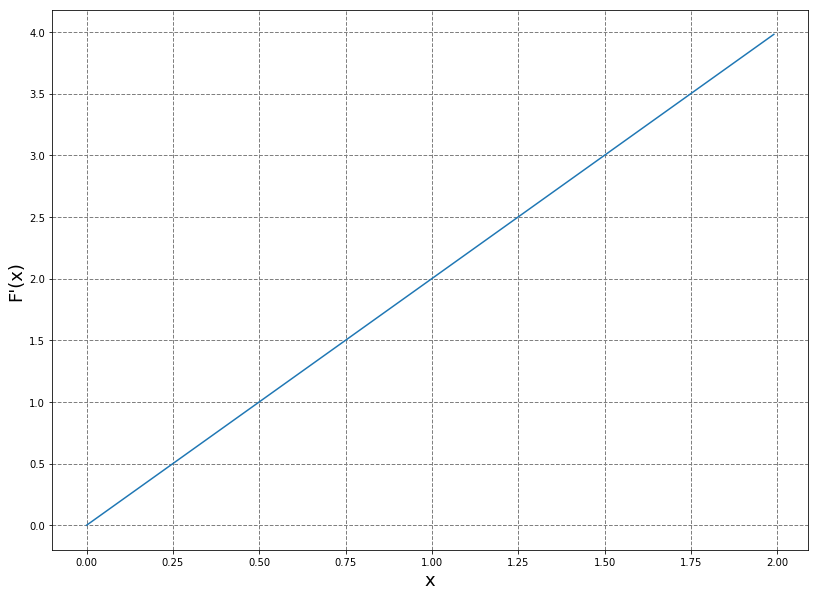

In [24]:
#Especificaciones del grafico
grafico = plt.figure( figsize = (7, 5) )
grafico.add_axes(rect)
plt.xlabel('x' ,fontsize = 18)
plt.ylabel("F'(x)",fontsize = 18)

#Visualizacion
plt.plot(rango_x, f_1_fder(rango_x))
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

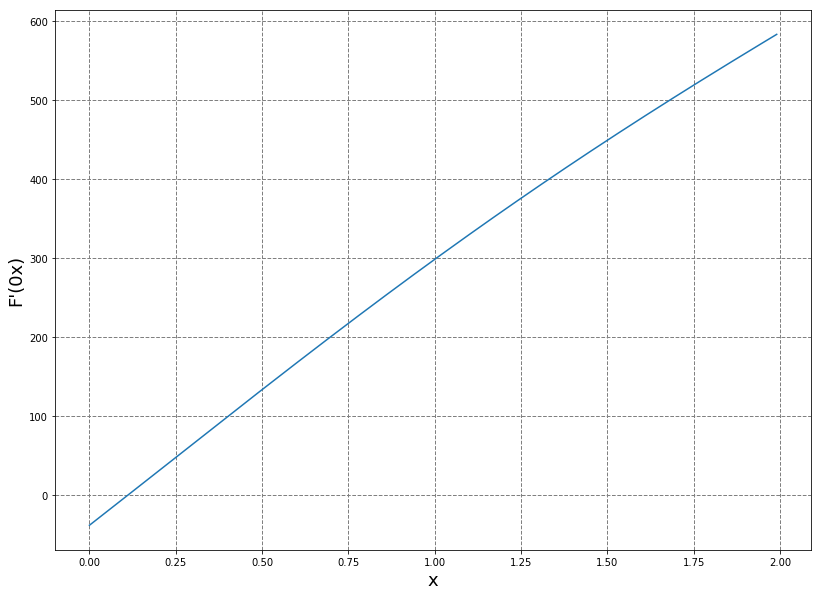

In [25]:
#Especificaciones del grafico
grafico = plt.figure( figsize = (7, 5) )
grafico.add_axes(rect)
plt.xlabel('x' ,fontsize = 18)
plt.ylabel("F'(0x)",fontsize = 18)

#Visualizacion
plt.plot(rango_x, f_2_fder(rango_x))
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

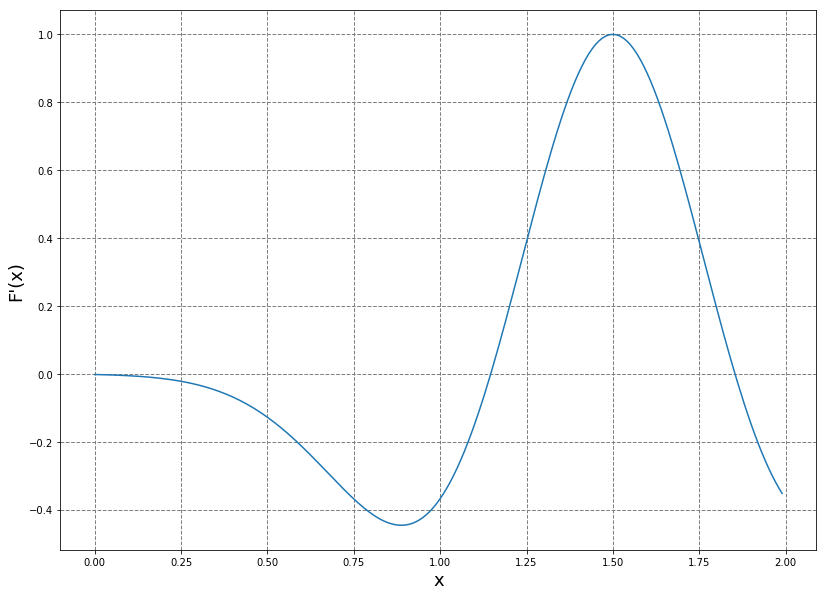

In [26]:
#Especificaciones del grafico
grafico = plt.figure( figsize = (7, 5) )
grafico.add_axes(rect)
plt.xlabel('x' ,fontsize = 18)
plt.ylabel("F'(x)",fontsize = 18)

#Visualizacion
plt.plot(rango_x, f_3_fder(rango_x))
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

## Derivadas Segunda

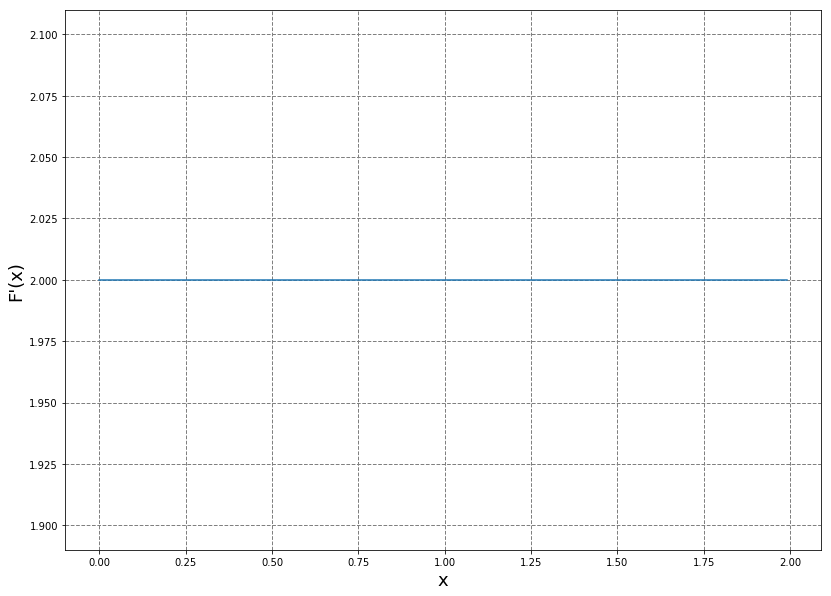

In [27]:
#Especificaciones del grafico
grafico = plt.figure( figsize = (7, 5) )
grafico.add_axes(rect)
plt.xlabel('x' ,fontsize = 18)
plt.ylabel("F'(x)",fontsize = 18)

""" 
Por cuestines de implementacion, f_1_sder(rango_x)
no genera un vector. Como sabemos que es un vector 
'2' lo definimos nostros
"""

f_1_sder_evaluated = []
for i in range( len(rango_x) ):
    f_1_sder_evaluated.append(2)

#Visualizacion
plt.plot(rango_x, f_1_sder_evaluated)
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

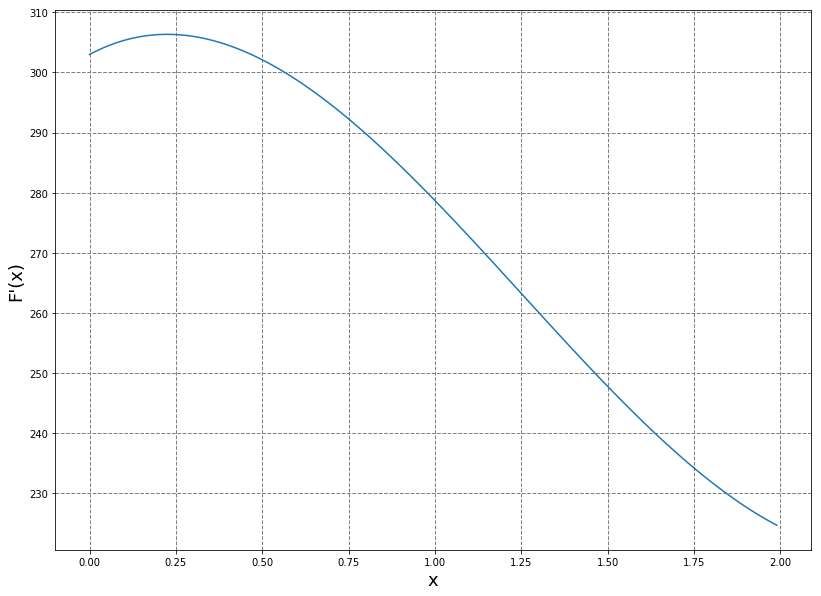

In [28]:
#Especificaciones del grafico
grafico = plt.figure( figsize = (7, 5) )
grafico.add_axes(rect)
plt.xlabel('x' ,fontsize = 18)
plt.ylabel("F'(x)",fontsize = 18)

#Visualizacion
plt.plot(rango_x, f_2_sder(rango_x))
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

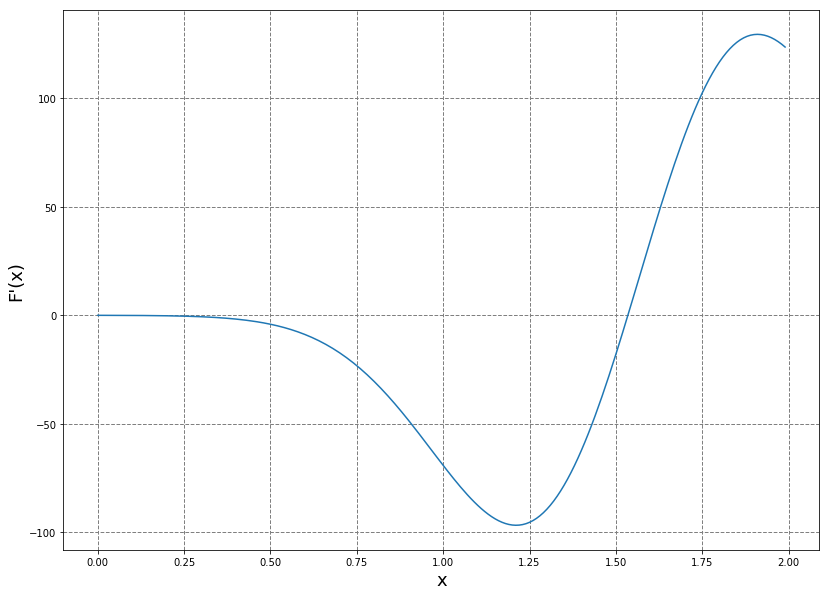

In [29]:
#Especificaciones del grafico
grafico = plt.figure( figsize = (7, 5) )
grafico.add_axes(rect)
plt.xlabel('x' ,fontsize = 18)
plt.ylabel("F'(x)",fontsize = 18)

#Visualizacion
plt.plot(rango_x, f_3_sder(rango_x))
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

## Raices con scipy.optimize.brentq

In [30]:
scop.brentq(f_1, 0, 2)

1.4142135623731364

In [35]:
scop.brentq(f_2, 0, 2)

1.2000081652661798

In [36]:
scop.brentq(f_3, 0, 2)

1.5000000000000198